In [1]:
import os
from glob import glob
import cv2
import matplotlib.pyplot as plt

train_root = "../data/raw/train"
test_root = "../data/raw/test"
classes = sorted(os.listdir(train_root))
classes


['Glioma', 'Meningioma', 'NoTumor', 'Pituitary']

In [2]:
for cls in classes:
    n_train = len(glob(os.path.join(train_root, cls, "*")))
    n_test = len(glob(os.path.join(test_root, cls, "*")))
    print(f"{cls:10s} | train: {n_train:4d} | test: {n_test:4d}")


Glioma     | train:  826 | test:  100
Meningioma | train:  822 | test:  115
NoTumor    | train:  395 | test:  105
Pituitary  | train:  827 | test:   74


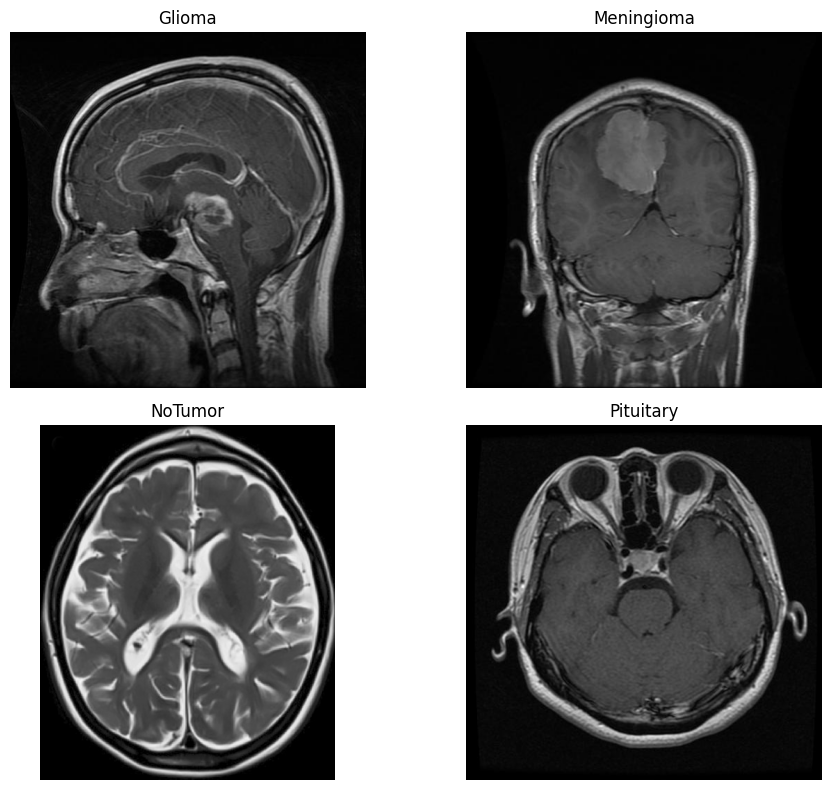

In [3]:
import random

plt.figure(figsize=(10, 8))

for i, cls in enumerate(classes):
    paths = glob(os.path.join(train_root, cls, "*"))
    img_path = random.choice(paths)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
sizes = []

for cls in classes:
    paths = glob(os.path.join(train_root, cls, "*"))[:100]  # sample
    for p in paths:
        img = cv2.imread(p)
        h, w = img.shape[:2]
        sizes.append((w, h))

widths  = [w for w, h in sizes]
heights = [h for w, h in sizes]

print("Width  min/mean/max:", min(widths), sum(widths)/len(widths), max(widths))
print("Height min/mean/max:", min(heights), sum(heights)/len(heights), max(heights))


Width  min/mean/max: 201 474.58 1365
Height min/mean/max: 198 476.7725 1365
